### Now try to explore the 995K FakeNewsCorpus subset Download 995K FakeNewsCorpus subset. Make at least three non-trivial observations/discoveries about the data. These observations could be related to outliers, artefacts, or even better: genuinely interesting patterns in the data that could potentially be used for fake-news detection. Examples of simple observations could be how many missing values there are in particular columns - or what the distribution over domains is. Be creative!

In [4]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

file_path = "995,000_rows.csv"
chunksize = 10000 

# Columns to analyze for missing metadata
metadata_cols = ['authors', 'meta_keywords', 'meta_description', 'tags', 'summary']

# Accumulators for observations
total_rows = 0
missing_counts_acc = None
domain_counts_acc = {}
error_count_acc = 0

# Process the CSV in chunks
for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
    total_rows += len(chunk)
    
    # Observation 1: Missing values for metadata columns
    chunk_missing = chunk[metadata_cols].isnull().sum()
    if missing_counts_acc is None:
        missing_counts_acc = chunk_missing
    else:
        missing_counts_acc += chunk_missing

    # Observation 2: Domain distribution 
    chunk_domain_counts = chunk['domain'].value_counts()
    for domain, count in chunk_domain_counts.items():
        domain_counts_acc[domain] = domain_counts_acc.get(domain, 0) + count

    # Observation 3: Content Artifacts and Anomalies
    # Converts the 'content' column to string
    chunk['content'] = chunk['content'].astype(str)
    # Detect rows containing explicitly "error"
    error_mask = chunk['content'].str.contains(r"\berror\b", case=False, regex=True, na=False)
    error_count_acc += error_mask.sum()

    # Aggregate word counts: combine all content and update the counter.
    combined_text = " ".join(chunk['content'].tolist())
    words = re.findall(word_pattern, combined_text.lower())
    word_counter.update(words)

# Results after processing
print("Total rows processed:", total_rows)

print("\nMissing values in metadata columns (count):")
print(missing_counts_acc)
print("\nMissing values in metadata columns (percentage):")
print((missing_counts_acc / total_rows * 100).round(2))

print("\nDomain distribution (top 10):")
domain_series = pd.Series(domain_counts_acc).sort_values(ascending=False)
print(domain_series.head(10))

print("\nTotal articles with explicit 'error' in content:", error_count_acc)

Total rows processed: 995000

Missing values in metadata columns (count):
authors             442757
meta_keywords        38790
meta_description    525106
tags                764081
summary             995000
dtype: int64

Missing values in metadata columns (percentage):
authors              44.50
meta_keywords         3.90
meta_description     52.77
tags                 76.79
summary             100.00
dtype: float64

Domain distribution (top 10):
nytimes.com           176144
beforeitsnews.com      91468
dailykos.com           77640
express.co.uk          55983
nationalreview.com     37377
sputniknews.com        37229
abovetopsecret.com     27947
wikileaks.org          23699
www.newsmax.com        12688
www.ammoland.com       11129
dtype: int64

Total articles with explicit 'error' in content: 78554


#### Describe how you ended up representing the FakeNewsCorpus dataset (for instance with a Pandas dataframe). Argue for why you chose this design

We decided to represent the FakeNewsCorpus dataset using a Pandas DataFrame because the data was already in CSV format with columns like id, domain, content, and metadata. Using a DataFrame made it straightforward to load the entire table into memory, even though it has nearly a million rows, and provided an easy way to clean, filter, and analyze the data using built-in functions. This design was chosen because it simplifies the data tasks in this task: we could quickly compute statistics, check for missing values, and even visualize distributions without writing a lot of code. Even though our computers sometimes struggles with very large files and can handle different sizes, Pandas lets us process the data in chunks, so we could easily work on a subset of the data and then combine the results. So we chose Pandas, because it turns this messy CSV data into a table that is easier to understand and work with, and it has all the tools that we needed.


#### Did you discover any inherent problems with the data while working with it?

We initially attempted to load the entire dataset using pd.read_csv with low_memory=False to address the DtypeWarnings (especially in columns 0 and 1, which indicated mixed data types), but this approach overwhelmed our system and caused it to crash. We had to kill the process. Recognizing that our computer couldn’t handle the full dataset at once, we switched to a chunk-based approach. 


#### Report key properties of the data set - for instance through statistics or visualization

Total rows processed: 995000

Missing values in metadata columns (count):
authors             442757
meta_keywords        38790
meta_description    525106
tags                764081
summary             995000
dtype: int64

Missing values in metadata columns (percentage):
authors              44.50
meta_keywords         3.90
meta_description     52.77
tags                 76.79
summary             100.00
dtype: float64

Domain distribution (top 10):
nytimes.com           176144
beforeitsnews.com      91468
dailykos.com           77640
express.co.uk          55983
nationalreview.com     37377
sputniknews.com        37229
abovetopsecret.com     27947
wikileaks.org          23699
www.newsmax.com        12688
www.ammoland.com       11129
dtype: int64

Total articles with 'error' in content: 78554

Content length statistics:
count    995000.000000
mean       2851.342791
std        4111.355649
min           3.000000
25%         655.000000
50%        1817.000000
75%        3690.000000
max     

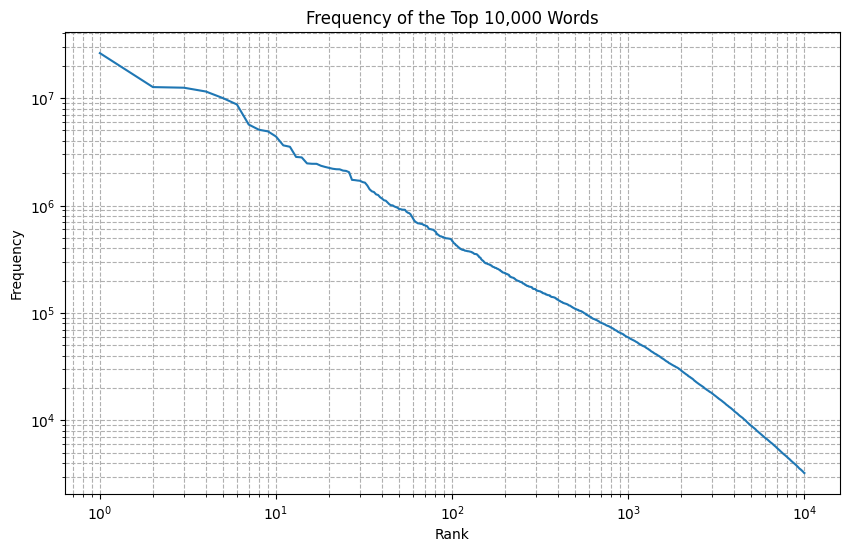


Graph Explanation:
1. X-axis (Rank): Words are ordered by how common they are. Rank 1 is the most common word.
2. Y-axis (Frequency): Shows how many times a word appears.
3. Log-log scale: Both axes use a logarithmic scale, which helps to see details across a wide range of values.
4. What it shows: A few words (like 'the', 'and') appear very frequently, while many words are rare. This pattern is known as Zipf's law.


In [3]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

file_path = "995,000_rows.csv"
chunksize = 10000  

# Columns to analyze for missing metadata
metadata_cols = ['authors', 'meta_keywords', 'meta_description', 'tags', 'summary']

# Accumulators for initial observations
total_rows = 0
missing_counts_acc = None
domain_counts_acc = {}
error_count_acc = 0
content_lengths = []

# Accumulators for content analysis
total_urls = 0
total_dates = 0
total_numerics = 0
word_counter = Counter()

# Process the CSV in chunks
for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
    total_rows += len(chunk)
    
    # Observation 1: Missing values for metadata columns 
    chunk_missing = chunk[metadata_cols].isnull().sum()
    if missing_counts_acc is None:
        missing_counts_acc = chunk_missing
    else:
        missing_counts_acc += chunk_missing

    # Observation 2: Domain distribution 
    chunk_domain_counts = chunk['domain'].value_counts()
    for domain, count in chunk_domain_counts.items():
        domain_counts_acc[domain] = domain_counts_acc.get(domain, 0) + count

    # Observation 3: Content Artifacts and Anomalies
    # Convert the 'content' column to string
    chunk['content'] = chunk['content'].astype(str)
    # Detect rows containing "error"
    error_mask = chunk['content'].str.contains(r"\berror\b", case=False, regex=True, na=False)
    error_count_acc += error_mask.sum()

    # Accumulate content lengths
    content_lengths.extend(chunk['content'].apply(len).tolist())
    
    # Counting URLs, dates, numeric values, and aggregating words
    # Inline regex patterns with (?i) for case-insensitive matching
    url_regex = r'(?i)https?://\S+'
    date_regex = r'(?i)\b(?:\d{1,2}[/-]\d{1,2}[/-]\d{2,4}|\d{4}-\d{2}-\d{2})\b'
    numeric_regex = r'\b\d+(?:\.\d+)?\b'
    word_regex = r'\w+'
    
    total_urls += chunk['content'].str.count(url_regex).sum()
    total_dates += chunk['content'].str.count(date_regex).sum()
    total_numerics += chunk['content'].str.count(numeric_regex).sum()
    
    # Aggregate word counts for the top frequent words
    combined_text = " ".join(chunk['content'].tolist())
    words = re.findall(word_regex, combined_text.lower())
    word_counter.update(words)

# Results after processing
print("Total rows processed:", total_rows)

print("\nMissing values in metadata columns (count):")
print(missing_counts_acc)
print("\nMissing values in metadata columns (percentage):")
print((missing_counts_acc / total_rows * 100).round(2))

print("\nDomain distribution (top 10):")
domain_series = pd.Series(domain_counts_acc).sort_values(ascending=False)
print(domain_series.head(10))

print("\nTotal articles with 'error' in content:", error_count_acc)

print("\nContent length statistics:")
print(pd.Series(content_lengths).describe())

# Additional content analysis results
print("\nTotal URLs found in content:", total_urls)
print("Total dates found in content:", total_dates)
print("Total numeric values found in content:", total_numerics)

# Top 100 most frequent words
top_100_words = word_counter.most_common(100)
print("\nTop 100 most frequent words:")
for word, count in top_100_words:
    print(f"{word}: {count}")

# Plot frequency of the top 10,000 most frequent words
top_10000 = word_counter.most_common(10000)
if top_10000:
    ranks = range(1, len(top_10000) + 1)
    frequencies = [freq for word, freq in top_10000]
    
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, frequencies)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Frequency of the Top 10,000 Words')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")
    plt.show()
    
else:
    print("Not enough words to plot the top 10,000 frequencies.")


And from these value we can see that

**Total rows processed**: 995000 rows processed 

Missing values in **metadata columns** (count and percentage):
    For each metadata column, the script counted how many articles were missing data.

**authors**: 442,757 articles (about 44.50%) are missing an author name.

**meta_keywords**: 38,790 articles (3.90%) are missing meta keywords. (These are words or phrases included in a webpage’s HTML header intended to represent the main topics covered in the content)

**meta_description**: 525,106 articles (52.77%) have no meta description. (This is a brief summary of the webpage’s content provided in the HTML header.)

**tags**: 764,081 articles (76.79%) are missing tags. (Tags are labels or categories assigned to content by the publisher or content management system.)

**summary**: 995,000 articles (100%) have no summary at all.
In plain terms, many articles lack additional descriptive information, which might be a problem when trying to use this extra data.

**Domain distribution** (top 10): This tells you how many articles come from each website. For example:
    The New York Times (nytimes.com) appears 176,144 times.
    BeforeItsNews.com appears 91,468 times.
        And so on for the top 10 sites. This shows which sources are most common in the dataset.

**Total articles** with 'error' in content: 78554
    This means that 84 articles include the phrase "Fatal error" in their text. This might indicate issues in how the articles were scraped or technical errors on the source websites.

**Content length statistics**: These numbers summarize how long the article texts are (in characters). For example:
    **mean**: On average, each article has about 2,851 characters.
    **std (standard deviation)**: There is a lot of variation (4,111 characters) in article lengths.
    **min**: The shortest article has 3 characters.
    **25%, 50%, 75%**: 25% of articles have 655 characters or fewer, the median (50%) is 1,817 characters, and 75% of articles have 3,690 characters or fewer.

**max**: The longest article is 189,025 characters long.
    This tells us that while most articles are a few thousand characters long, there are some extremely long outliers.

**Graph Explanation**:
1. X-axis (Rank): Words are ordered by how common they are. Rank 1 is the most common word.
2. Y-axis (Frequency): Shows how many times a word appears.
3. Log-log scale: Both axes use a logarithmic scale.
4. What it shows: A few words (like 'the', 'and') appear very frequently, while many words are rare.
